# SETUP

In [1]:
# python >= 3.5 version
import sys
assert sys.version_info >= (3,5)

# scikit-learn >= 0.20 is required
import sklearn 
assert sklearn.__version__ >= '0.20'

# tensorflow >=2.0 is required
import tensorflow as tf
assert tf.__version__ >= '2.0'

# import for manipulate data structure
import pandas as pd
import numpy as np
import os

# to make this notebook are stable output accros runs
np.random.seed(42)

#to plot prety figure
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save the figure automatic
root ='.'
chapter_id = 'ann'
images_path = os.path.join(root,'images',chapter_id)
os.makedirs(images_path,exist_ok=True)

def save_fig(fig_id,tigh_layout=True,fig_extension='png',resolution=300):
    path = os.path.join(images_path,fig_id+'.'+fig_extension)
    print('save figure',fig_id)
    if tigh_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,resolution=resolution)


In [2]:
# load data from data set
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
X = iris.data[:,(2,3)]# petal lenght and width
y = (iris.target == 0).astype(np.int) #iris setosa

C:\Users\User\AppData\Local\Temp\ipykernel_7360\2176583148.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #iris setosa


In [4]:
per_clf = Perceptron(max_iter=1000,tol=10e-3,random_state=42)
per_clf.fit(X,y)

Perceptron(random_state=42, tol=0.01)

In [5]:
y_pred = per_clf.predict([[2.0 , 0.5]])
y_pred

array([1])

1 => dia termasuk sebuah jenis setosa

Make the boundary for visualisation

In [6]:
per_clf.coef_

array([[-1.4, -2.2]])

In [7]:
per_clf.intercept_

array([4.])

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1] # - agar nilainya tetap
b = -per_clf.intercept_ / per_clf.coef_[0][1]
print(a)
print(b)


-0.6363636363636362
[1.81818182]


In [9]:
axes = [0,5,0,2]
x0,x1 = np.meshgrid(
    np.linspace(axes[0],axes[1],500).reshape(-1,1),
    np.linspace(axes[2],axes[3],500).reshape(-1,1)
)
x_new = np.c_[x0.ravel(),x1.ravel()]#ravel to get one baris data, more feature interation
y_predict = per_clf.predict(x_new)
zz = y_predict.reshape(x0.shape)#ukuran sesuai dari coefisien kalkulation

save figure precptron_iris_plot


C:\Users\User\AppData\Local\Temp\ipykernel_7360\3513732754.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


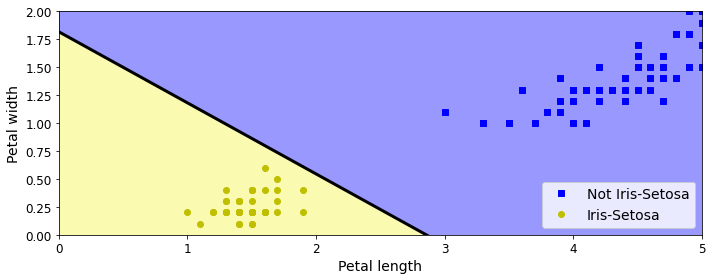

In [10]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
# X.W +B => Output Precptron -> decision boundary

# X = coefisen -> a
# W = axes 
# B = Bias

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
save_fig('precptron_iris_plot')
plt.show()

In [11]:
print(np.sign(-1))
print(np.sign(0))
print(np.sign(1))

-1
0
1


# Activation Functions

In [12]:
# fungsi aktivasi

#for forward function
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def relu(z):
    return np.maximum(0,z)
#for backward function to calculate gradient error
def derivativate(f,z,eps=0.000001):
    return (f(z + eps)- f(z - eps)) / (2 * eps)

save figure activation_functions_plot


C:\Users\User\AppData\Local\Temp\ipykernel_7360\3513732754.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "resolution" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(path,format=fig_extension,resolution=resolution)


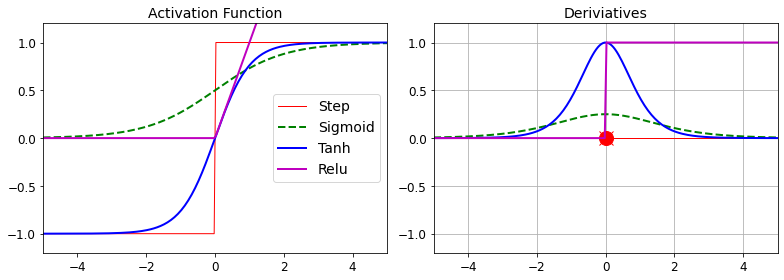

In [13]:
z = np.linspace(-5,5,200)

# set the figure 
plt.figure(figsize=(11,4))

# sub plot set to two

plt.subplot(121)
plt.plot(z,np.sign(z),'r-',linewidth=1,label='Step')
plt.plot(z,sigmoid(z),'g--',linewidth=2,label='Sigmoid')
plt.plot(z,np.tanh(z), 'b-',linewidth=2, label = 'Tanh')
plt.plot(z,relu(z), 'm-',linewidth=2,label='Relu')
plt.legend(loc='center right',fontsize=14)
plt.title('Activation Function',fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])#(x,y)

plt.subplot(122)
plt.plot(z,derivativate(np.sign,z),'r-',linewidth=1,label='Step')
plt.plot(0,0,'ro',markersize=14)
plt.plot(0,0,'rx',markersize=14)
plt.plot(z,derivativate(sigmoid,z),'g--',linewidth=2,label='Sigmoid')
plt.plot(z,derivativate(np.tanh,z),'b-',linewidth=2,label='Tanh')
plt.plot(z,derivativate(relu,z),'m-',linewidth=2,label='Relu')
plt.grid(True)
plt.title('Deriviatives',fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])#(x,y)
save_fig("activation_functions_plot")
plt.show()